# Synchornization in complete networks of neurons
Here is the dynamics of neurons potentails in rotational model :
$$
\begin{cases}
\dot{\theta_i}=I_i - cos(\theta_i) +  E \\
\ddot{E}+ 2\alpha \dot{E}+\alpha^{2}E =\frac{\alpha^{2}}{N} \sum_{n|tـn<t} \delta(t - t_n - t_d)
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
num_neurons = 1000
g =  5
random_input_span = (1.2*10,2.8*10) #it should fall in the well defined cos(\theta) domain.

total_time = 1000
time_step = 0.01
total_steps = int(total_time/time_step)
time_span = np.arange(0,total_time,time_step)

delay_time = 0.1
delay_step = int(delay_time/time_step)

alpha = 20
m_arr = np.zeros(total_steps)
e_arr = np.zeros(total_steps)

theta_arr = np.zeros(num_neurons,dtype = float)
# theta_arr = np.random.uniform(0,2*np.pi,size = num_neurons)
random_input = np.random.uniform(*random_input_span,size = num_neurons)

In [3]:
spiking_records = np.array( np.zeros((total_steps,num_neurons)), dtype = bool )
amin_saman_param = np.zeros( total_steps )

## Instrumentes to capture spiking frequency
Here we use *cornometer* and number of spikies to measure their frequencies.

In [4]:
spiking_cornometer = np.zeros(num_neurons)
total_spikes_intervals = np.zeros(num_neurons)
total_spikes_num = np.zeros(num_neurons)

In [5]:
def retarded_spikes_record(step):
    """
    This is the function which take cares of response delay between spikes and their effects.
    """
    if step > delay_step: 
        return np.sum(spiking_records[step - delay_step])
    else:
        return 0


## "For" loop on the march!
To make equations more solvable we turn them into three cases of linear first order equations:
$$
\begin{cases}
\dot{\theta_i}=I_i - cos(\theta_i) - g E \\
\dot{E} = M - \alpha E\\
\dot{M} = -  \alpha M + \frac{ \alpha^{2} }{N} \sum_{n|tـn<t} \delta(t - t_n - t_d)
\end{cases}
$$

In [6]:
for i in tqdm( range(total_steps - 1) ):
    theta_arr = theta_arr + (random_input - np.cos(theta_arr) - g * e_arr[i] )*time_step
    
    #here we should spot the spiking neurons.
    spiking_records[i] = theta_arr > np.pi
    theta_arr = theta_arr - 2 * np.pi * spiking_records[i]
    #neurons activity
    m_arr[i+1] = m_arr[i] + time_step*( -alpha*m_arr[i] ) + ( (alpha**2)/num_neurons ) *retarded_spikes_record(i) 
    e_arr[i+1] = e_arr[i] + time_step*( m_arr[i] - alpha*e_arr[i] )
    #
    left_handed_neurons = np.cos(theta_arr) < 0
    amin_saman_param[i] = np.mean( np.sin(theta_arr[left_handed_neurons]) )**2
    #frequency calculator
    total_spikes_num = total_spikes_num + spiking_records[i]
    total_spikes_intervals = total_spikes_intervals + spiking_cornometer * spiking_records[i] #add to spike lapsed time
    spiking_cornometer = spiking_cornometer * (spiking_records[i]-1)*(-1) #reset the spikied cornos
    spiking_cornometer = spiking_cornometer + (spiking_records[i]-1)*(-1) #update the not spikied ones
    
    

  0%|                                                                                        | 0/99999 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████████████████████████████████████████████████████████████████████| 99999/99999 [00:23<00:00, 4233.51it/s]


(array([ 77.,  81., 137., 128., 120., 121.,  81.,  86.,  92.,  77.]),
 array([-3.13834401, -2.51374743, -1.88915085, -1.26455428, -0.6399577 ,
        -0.01536112,  0.60923546,  1.23383203,  1.85842861,  2.48302519,
         3.10762176]),
 <a list of 10 Patch objects>)

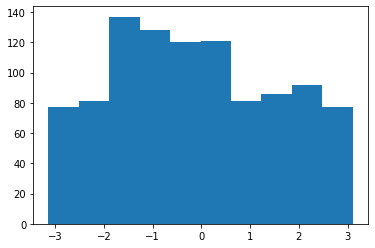

In [7]:
plt.hist(theta_arr)

In [8]:
sigma = np.std( e_arr )
sigma

0.13927076423713125

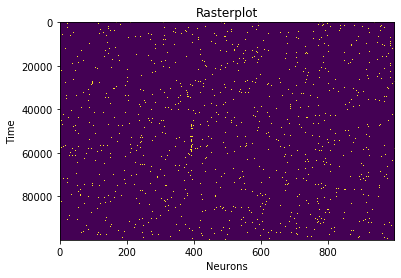

In [9]:
plt.imshow( spiking_records,aspect= 'auto')
plt.xlabel('Neurons')
plt.ylabel('Time')
plt.title('Rasterplot')
plt.savefig('raster_plot_N{}_g{}.png'.format(num_neurons,g))

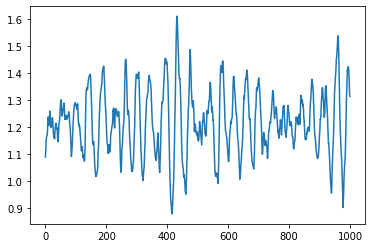

In [10]:
plt.plot(e_arr[-1000:])

(array([ 77.,  81., 137., 128., 120., 121.,  81.,  86.,  92.,  77.]),
 array([-3.13834401, -2.51374743, -1.88915085, -1.26455428, -0.6399577 ,
        -0.01536112,  0.60923546,  1.23383203,  1.85842861,  2.48302519,
         3.10762176]),
 <a list of 10 Patch objects>)

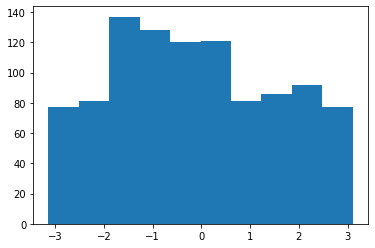

In [11]:
plt.hist(theta_arr )

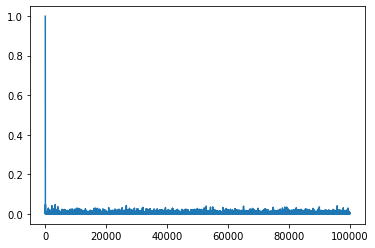

In [12]:
plt.plot(amin_saman_param)

In [13]:
np.mean(amin_saman_param[-100:])

0.002696176390622244

In [14]:
spikies_freq_neurons = total_spikes_intervals / total_spikes_num
spikies_freq_neurons

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([8.76841171e+01, 3.42641379e+02, 5.61394286e+01, 5.22118148e+01,
       6.24936468e+01, 5.07664423e+01, 5.88026316e+01, 1.10510045e+02,
       8.40042373e+02, 1.78500898e+02, 2.86426513e+02, 7.05733715e+01,
       2.94011834e+02, 1.27619048e+02, 5.23833422e+01, 1.00091001e+02,
       9.82601787e+01, 5.93852657e+01, 3.33267559e+02, 7.53575248e+01,
       3.81000000e+02, 1.18205251e+02, 4.37622033e+01, 3.53615658e+02,
       9.17402597e+01, 5.74395091e+01,            nan, 2.58000000e+02,
       9.51742060e+01, 9.93755020e+01, 1.19952785e+02, 3.56021429e+02,
       2.01484787e+02, 3.04006116e+02, 7.45151057e+01, 7.81369755e+01,
                  nan, 4.29033816e+01, 3.41126712e+02, 3.49698246e+02,
       4.94709743e+01, 6.43339869e+01, 1.12158550e+02,            nan,
       1.81771481e+02,            nan, 7.80418972e+01, 7.43436323e+01,
       5.87585176e+01, 1.22699257e+02, 2.93052941e+02, 7.10937275e+01,
       4.94745078e+01, 6.02481618e+01, 7.99619433e+01, 4.63256034e+01,
      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([951.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.88763462e+01, 4.43843871e+03, 8.83800108e+03, 1.32375634e+04,
        1.76371258e+04, 2.20366882e+04, 2.64362505e+04, 3.08358129e+04,
        3.52353753e+04, 3.96349376e+04, 4.40345000e+04]),
 <a list of 10 Patch objects>)

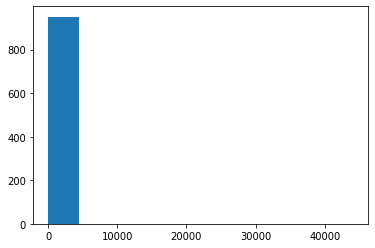

In [15]:
plt.hist(spikies_freq_neurons)